### What is DistilBERT
**BERT** is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications.



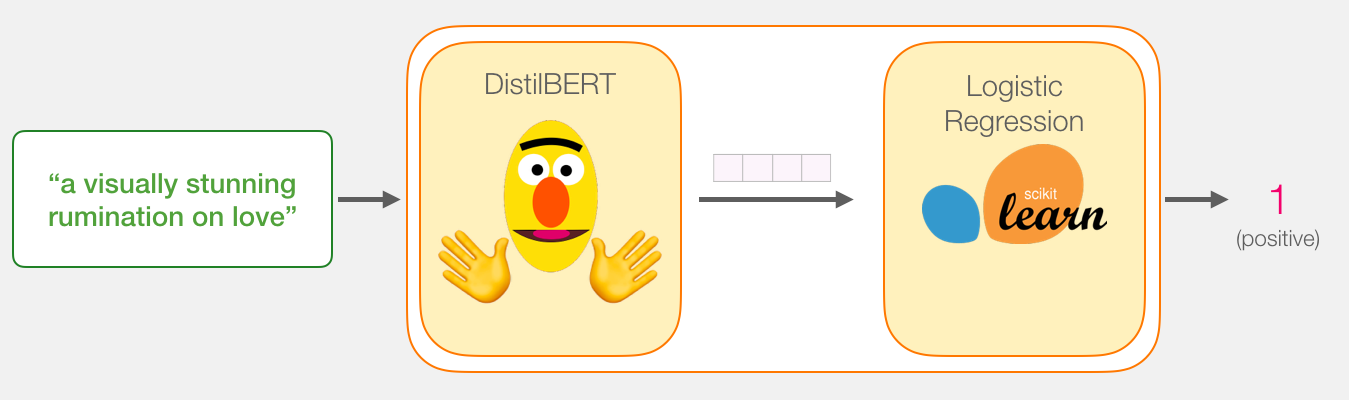

In [33]:
display.Image('bert-distilbert.png',width=900)

### DistilBERT 
It is a small, fast, cheap and light Transformer model trained by distilling Bert base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of Bert’s performances as measured on the GLUE language understanding benchmark.

In [24]:
  from google.colab import files
  uploaded = files.upload()

Saving 1_IFVX74cEe8U5D1GveL1uZA.png to 1_IFVX74cEe8U5D1GveL1uZA.png


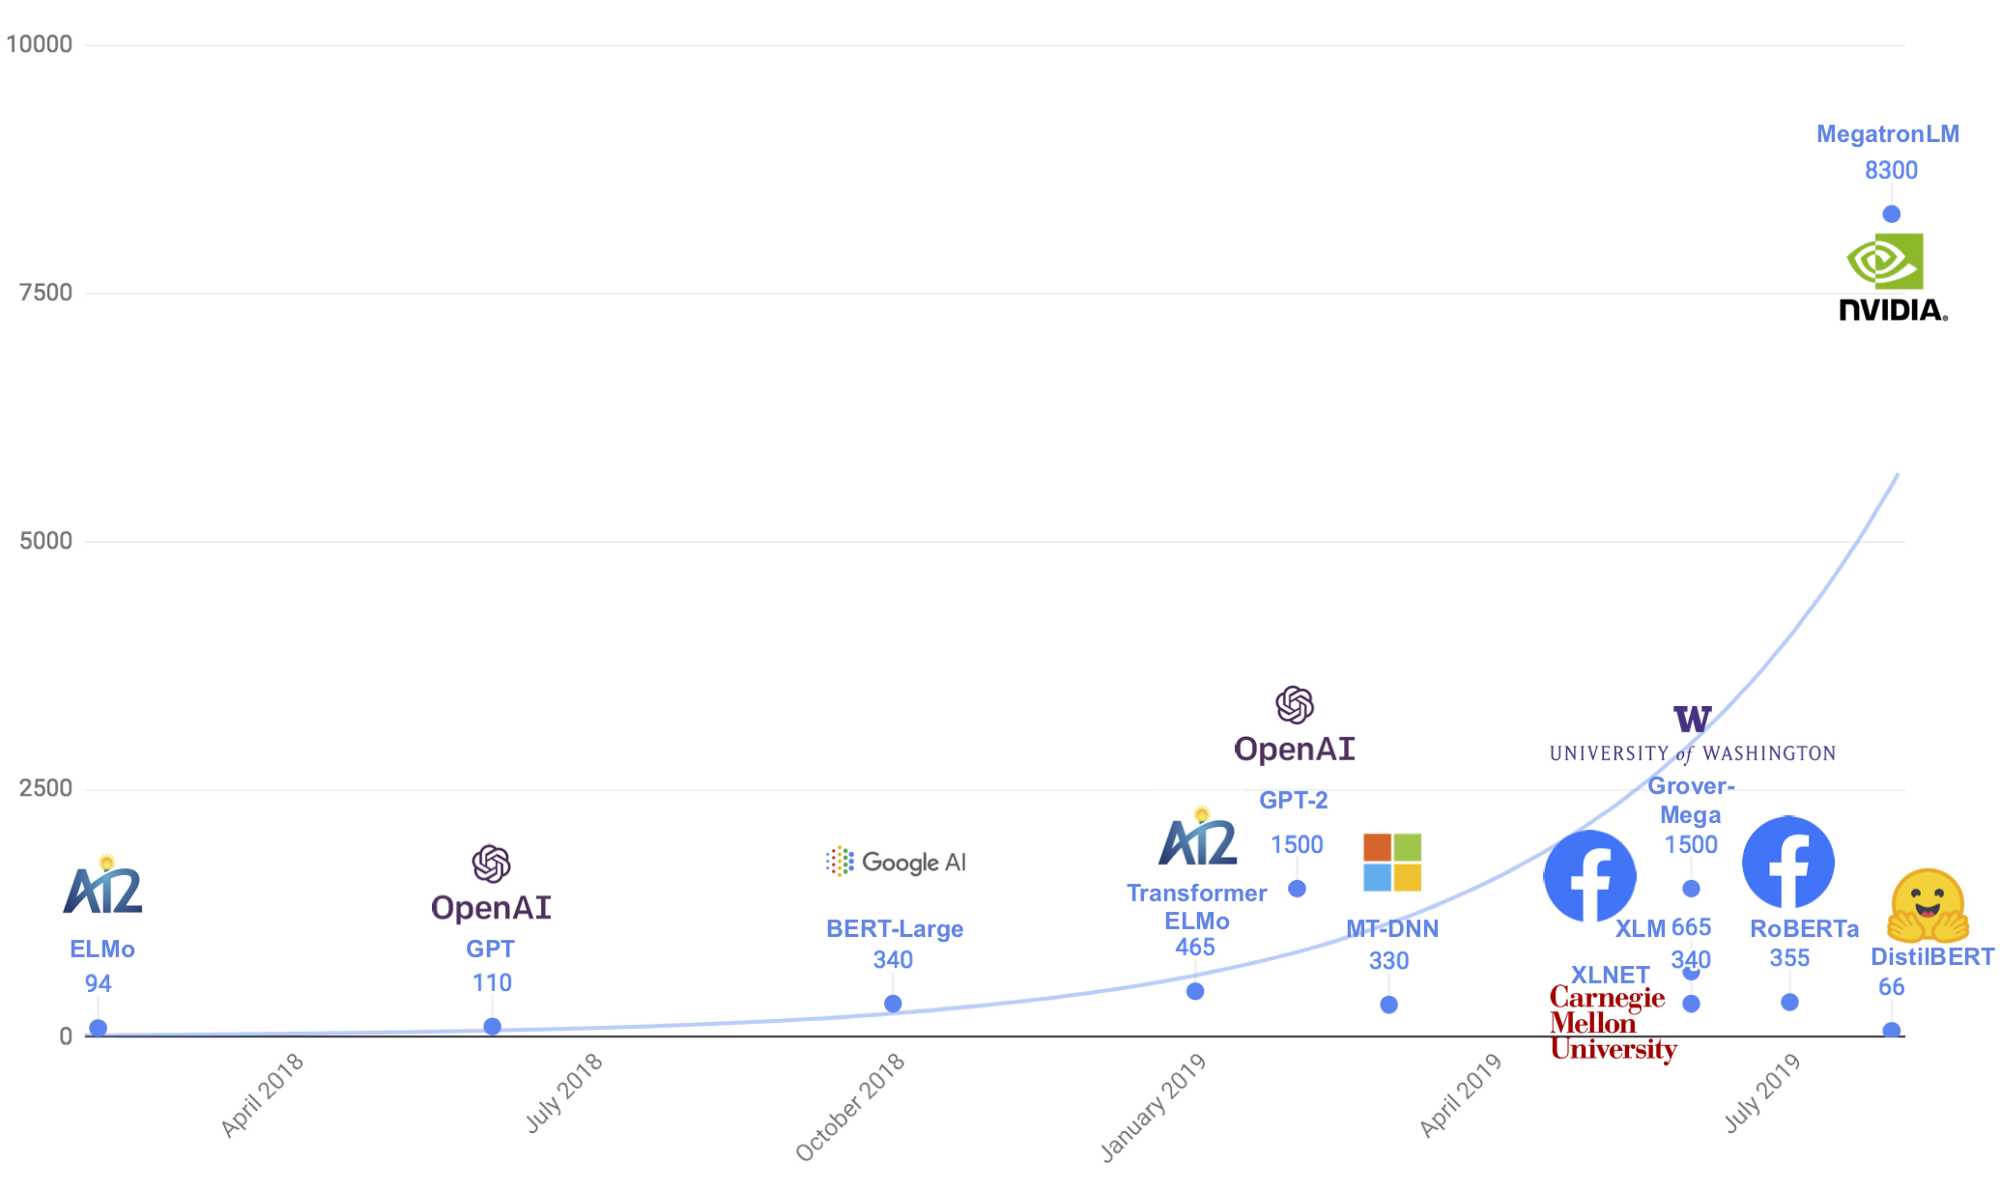

In [30]:
from IPython import display
display.Image('1_IFVX74cEe8U5D1GveL1uZA.png',width=900)

### What is ktrain
* ktrain is a library to help build, train, debug, and deploy neural networks in the deep learning software framework, Keras.

* ktrain uses tf.keras in TensorFlow instead of standalone Keras. Inspired by the fastai library, with only a few lines of code, ktrain allows you to easily:

1. Estimate an optimal learning rate for your model given your data using a     learning rate finder


2. Employ learning rate schedules such as the triangular learning rate policy, 1cycle policy, and SGDR to more effectively train your model

3. Employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, GRU with pretrained word embeddings) and image classification (e.g., ResNet, Wide Residual Networks, Inception)

4. Load and preprocess text and image data from a variety of formats

5. Inspect data points that were misclassified to help improve your model

6. Leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read the dataset
train_url="https://raw.githubusercontent.com/KrishArul26/Data_set/main/Disaster_Tweet_train.csv"
df=pd.read_csv(train_url,sep=",")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df=df.iloc[:,3:5]

In [13]:
df.shape

(7613, 2)

### Train-Test Split

In [14]:
from sklearn import model_selection
#splitting the data (80:20 ratio)
train,test=model_selection.train_test_split(df,test_size=0.2,random_state=100)

In [6]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
!pip install ktrain

In [7]:
import ktrain
from ktrain import text

### **Preprocess Data**

In [15]:
(train, val, preproc) = text.texts_from_df(train_df=train, text_column='text', label_columns='target',
                   val_df = test,
                   maxlen = 128,
                   preprocess_mode = 'distilbert')

['not_target', 'target']
      not_target  target
7556         1.0     0.0
2549         1.0     0.0
5370         0.0     1.0
3144         1.0     0.0
496          1.0     0.0
['not_target', 'target']
      not_target  target
3999         0.0     1.0
1849         1.0     0.0
5254         0.0     1.0
6645         1.0     0.0
6461         1.0     0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 24
	99percentile : 27


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 25
	99percentile : 27


### **Build a Model and Wrap in to the Learner**

In [16]:
model = text.text_classifier(name = 'distilbert', train_data = train, preproc=preproc)

Is Multi-Label? False
maxlen is 128



done.


In [18]:
learner = ktrain.get_learner(model = model,
                             train_data = train,
                             val_data = val,
                             batch_size = 32)

### **Finding the Optimal Learning Rate**

In [19]:
learner.lr_find()


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
190/190 [==============================] - 60s 243ms/step - loss: 0.6870 - accuracy: 0.5607
Epoch 2/1024
190/190 [==============================] - 48s 252ms/step - loss: 0.6542 - accuracy: 0.6443
Epoch 3/1024
190/190 [==============================] - 48s 251ms/step - loss: 0.4160 - accuracy: 0.8269
Epoch 4/1024
190/190 [==============================] - 48s 251ms/step - loss: 0.3678 - accuracy: 0.8546
Epoch 5/1024
190/190 [==============================] - 48s 251ms/step - loss: 0.4465 - accuracy: 0.8146
Epoch 6/1024
190/190 [==============================] - 48s 251ms/step - loss: 0.6882 - accuracy: 0.5734
Epoch 7/1024
190/190 [==============================] - 27s 140ms/step - loss: 1.9141 - accuracy: 0.5437


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


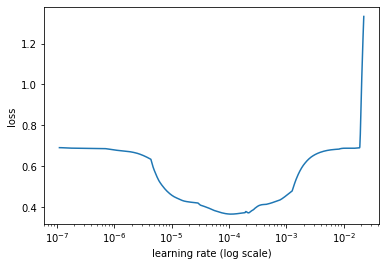

In [20]:
learner.lr_plot()

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

### **Compile the Model**

In [21]:
learner.fit_onecycle(lr = 1e-4, epochs=3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
191/191 [==============================] - 63s 271ms/step - loss: 0.5356 - accuracy: 0.7515 - val_loss: 0.3933 - val_accuracy: 0.8411
Epoch 2/3
191/191 [==============================] - 51s 262ms/step - loss: 0.3327 - accuracy: 0.8708 - val_loss: 0.4093 - val_accuracy: 0.8273
Epoch 3/3
191/191 [==============================] - 51s 262ms/step - loss: 0.2002 - accuracy: 0.9303 - val_loss: 0.4693 - val_accuracy: 0.8267


In [22]:
predictor = ktrain.get_predictor(model, preproc)

In [23]:
learner.validate(class_names=preproc.get_classes())

              precision    recall  f1-score   support

  not_target       0.83      0.87      0.85       871
      target       0.81      0.77      0.79       652

    accuracy                           0.83      1523
   macro avg       0.82      0.82      0.82      1523
weighted avg       0.83      0.83      0.83      1523



array([[757, 114],
       [150, 502]])

### **Conclussion**

Finally, Using Distil Bert we got an accuracy of around 84%. It's good because for the text analysis this text contains various kind the context even though our model has good accuracy.

Here, **ktrain** is the free library for doing deep learning work quickly &  faster than the manual method. It will help to find the optimal learning rate very effectively.